In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv("/content/titanic.csv")

In [4]:
print(titanic.info())
print(titanic.describe())
print(titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna('S', inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)
titanic['Cabin'].fillna('Unknown', inplace=True)

In [6]:
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')

In [7]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)
titanic['Title'] = titanic['Name'].str.split('[,.]').str[1].str.strip()
titanic['Title'] = titanic['Title'].astype('category')

In [8]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
X = pd.get_dummies(titanic.drop('Survived', axis=1), drop_first=True)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
rf_model = RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=123)

In [14]:
rf_predictions = rf_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Confusion Matrix:
[[96 18]
 [14 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       114
           1       0.74      0.78      0.76        65

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



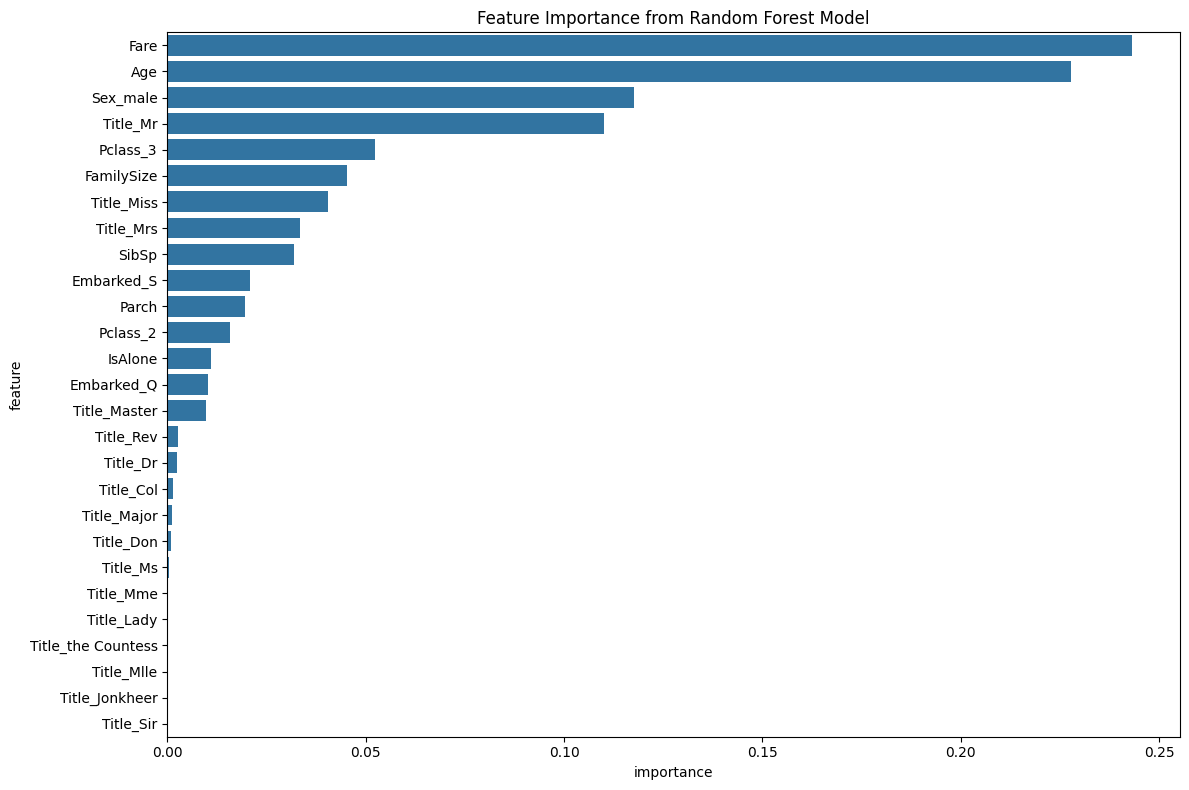

In [15]:
importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance from Random Forest Model')
plt.tight_layout()
plt.show()

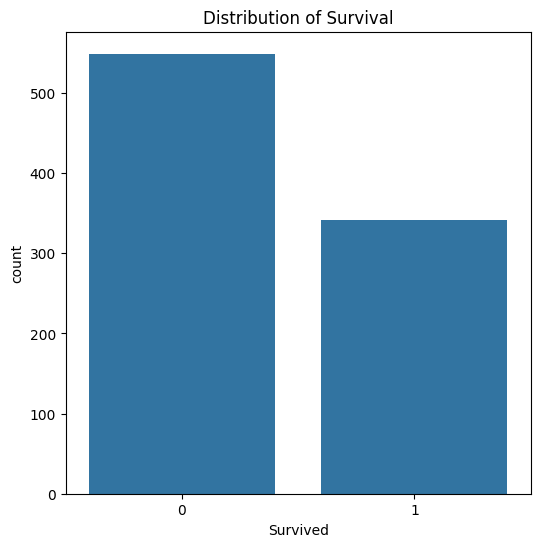

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

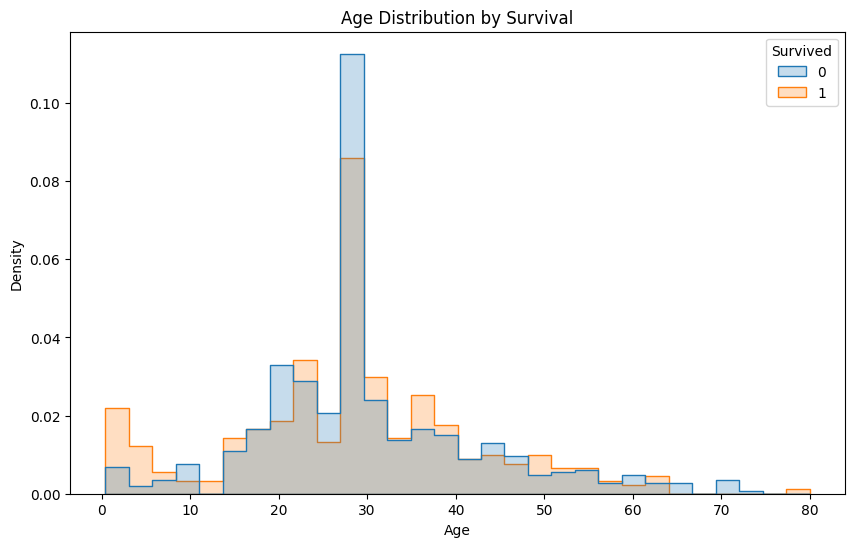

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival')
plt.show()


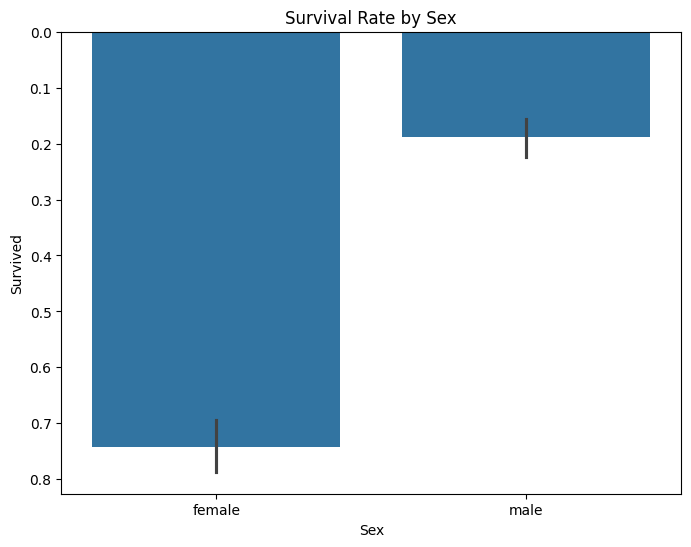

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()

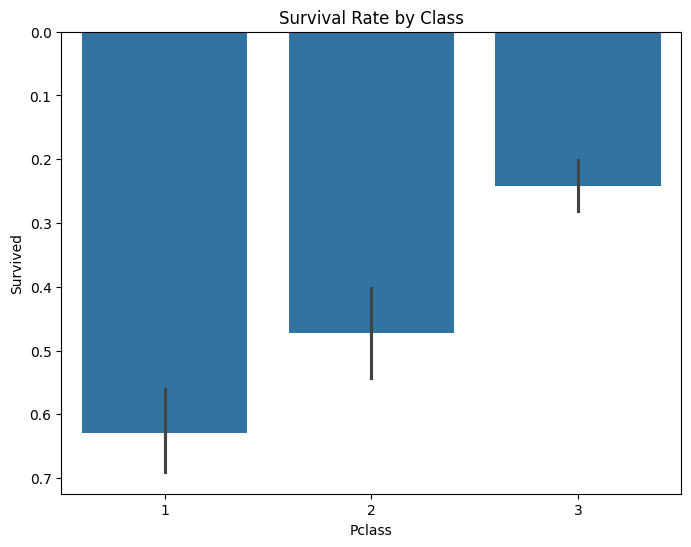

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Class')
plt.show()